## Pengcheng Xu   (pxu02)



## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [81]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [82]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

# print(x_tr_N2.shape)
# print(y_tr_N.shape)

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [83]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list

converge_iters_list = []
clfs_list = []
mlp_lbfgs_relu_losscurve_list = []

n_runs = 16
for rand_state in range(n_runs):
    print(rand_state)
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=rand_state,
    )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
        elapsed_time_sec = time.time() - start_time_sec
        clfs_list.append(mlp_lbfgs)
        print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        rand_state + 1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
        mlp_lbfgs_relu_losscurve_list.append(mlp_lbfgs.loss_curve_)
        print(mlp_lbfgs.loss_)
        
        converge_iters_list.append(len(mlp_lbfgs.loss_curve_))


0
finished LBFGS run  1/16 after    0.0 sec |  29 iters | converged    | loss 0.347
0.3465809237054605
1
finished LBFGS run  2/16 after    0.0 sec |  29 iters | converged    | loss 0.477
0.4773894165261561
2
finished LBFGS run  3/16 after    0.0 sec |  21 iters | converged    | loss 0.347
0.34657948824255
3
finished LBFGS run  4/16 after    0.0 sec |  35 iters | converged    | loss 0.347
0.3465789353933526
4
finished LBFGS run  5/16 after    0.0 sec |  29 iters | converged    | loss 0.347
0.34658065881713707
5
finished LBFGS run  6/16 after    0.0 sec |  29 iters | converged    | loss 0.000
1.5701585264702537e-05
6
finished LBFGS run  7/16 after    0.0 sec |  23 iters | converged    | loss 0.000
1.5513765678888198e-05
7
finished LBFGS run  8/16 after    0.0 sec |  37 iters | converged    | loss 0.347
0.3465820538081762
8
finished LBFGS run  9/16 after    0.0 sec |  15 iters | converged    | loss 0.347
0.34665524481177046
9
finished LBFGS run 10/16 after    0.0 sec |  26 iters | converg

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh th

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

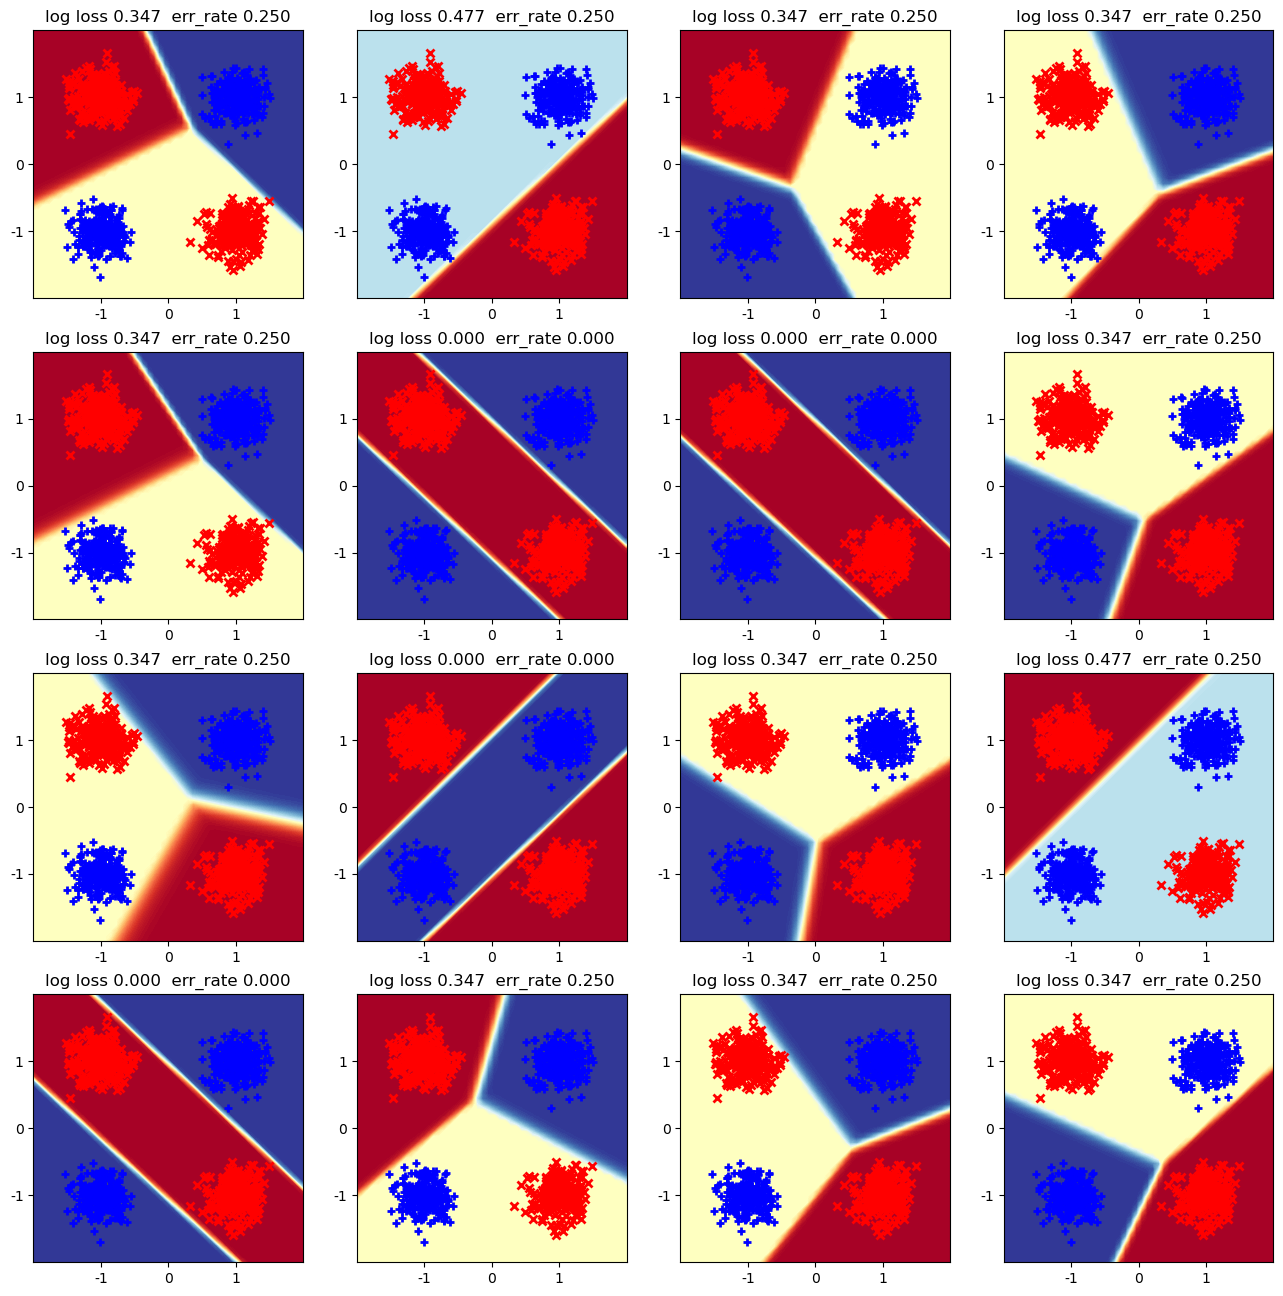

In [84]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
ncols = 4
for i in range(n_runs):
    ax_row_idx = i // ncols
    ax_col_idx = i % ncols
    plot_pretty_probabilities_for_clf(clfs_list[i], x_tr_N2, y_tr_N, ax=ax_grid[ax_row_idx, ax_col_idx])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

In [85]:
print(np.array(converge_iters_list).mean())

28.75


**Answer**: 
> In total 16 runs, 4 runs ( i.e. random_state = 5, 6, 9, 12 ) reach 0 training error. So the fraction is $\frac{1}  {4}$  ( i.e. $\frac{4}{16}$ ).
> 
> Others all have the error rate 0.25. I suppose this would happen since from the graphs we could see, all other
> classfiers at lease have one category ( i.e. denotated by one background color ) that have two different classes in it. In other words, it could differentiate those two different classes falling into that category. E.g. The last training model has the red class (i.e. 'x') and the blue class (i.e. '+') inputs in the top category (i.e. yellow background).  
> The other thing we've noticed is that the decision boundaries are straight lines, which is understandable since the 
> "ReLu" activation function is a piece-wise linear function. The sum of "ReLu"s should also be a linear function.
>
> On average, it takes 28.75 iterations for models to converge (i.e. we do it by recording each converging iterations for each model, and compute the mean of this list)
>

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [86]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation

# Save each run's trained classifier object in a list
act_logistic_clf_list = []
act_logistic_converge_iters_list = []
mlp_lbfgs_logistic_losscurve_list = []

for rand_state in range(n_runs):
    print(rand_state)
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=rand_state,
    )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
        act_logistic_clf_list.append(mlp_lbfgs)
        elapsed_time_sec = time.time() - start_time_sec
        print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        rand_state + 1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
        act_logistic_converge_iters_list.append(len(mlp_lbfgs.loss_curve_))
        mlp_lbfgs_logistic_losscurve_list.append(mlp_lbfgs.loss_curve_)
        

0
finished LBFGS run  1/16 after    0.0 sec |  56 iters | converged    | loss 0.000
1
finished LBFGS run  2/16 after    0.0 sec | 119 iters | converged    | loss 0.347
2
finished LBFGS run  3/16 after    0.0 sec |  45 iters | converged    | loss 0.347
3
finished LBFGS run  4/16 after    0.0 sec |  82 iters | converged    | loss 0.000
4
finished LBFGS run  5/16 after    0.0 sec |  40 iters | converged    | loss 0.477
5
finished LBFGS run  6/16 after    0.0 sec |  42 iters | converged    | loss 0.000
6
finished LBFGS run  7/16 after    0.0 sec |  50 iters | converged    | loss 0.000
7
finished LBFGS run  8/16 after    0.0 sec |  42 iters | converged    | loss 0.477
8
finished LBFGS run  9/16 after    0.0 sec |  72 iters | converged    | loss 0.347
9
finished LBFGS run 10/16 after    0.0 sec | 149 iters | converged    | loss 0.347
10
finished LBFGS run 11/16 after    0.0 sec |  86 iters | converged    | loss 0.347
11
finished LBFGS run 12/16 after    0.0 sec | 106 iters | converged    | l

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

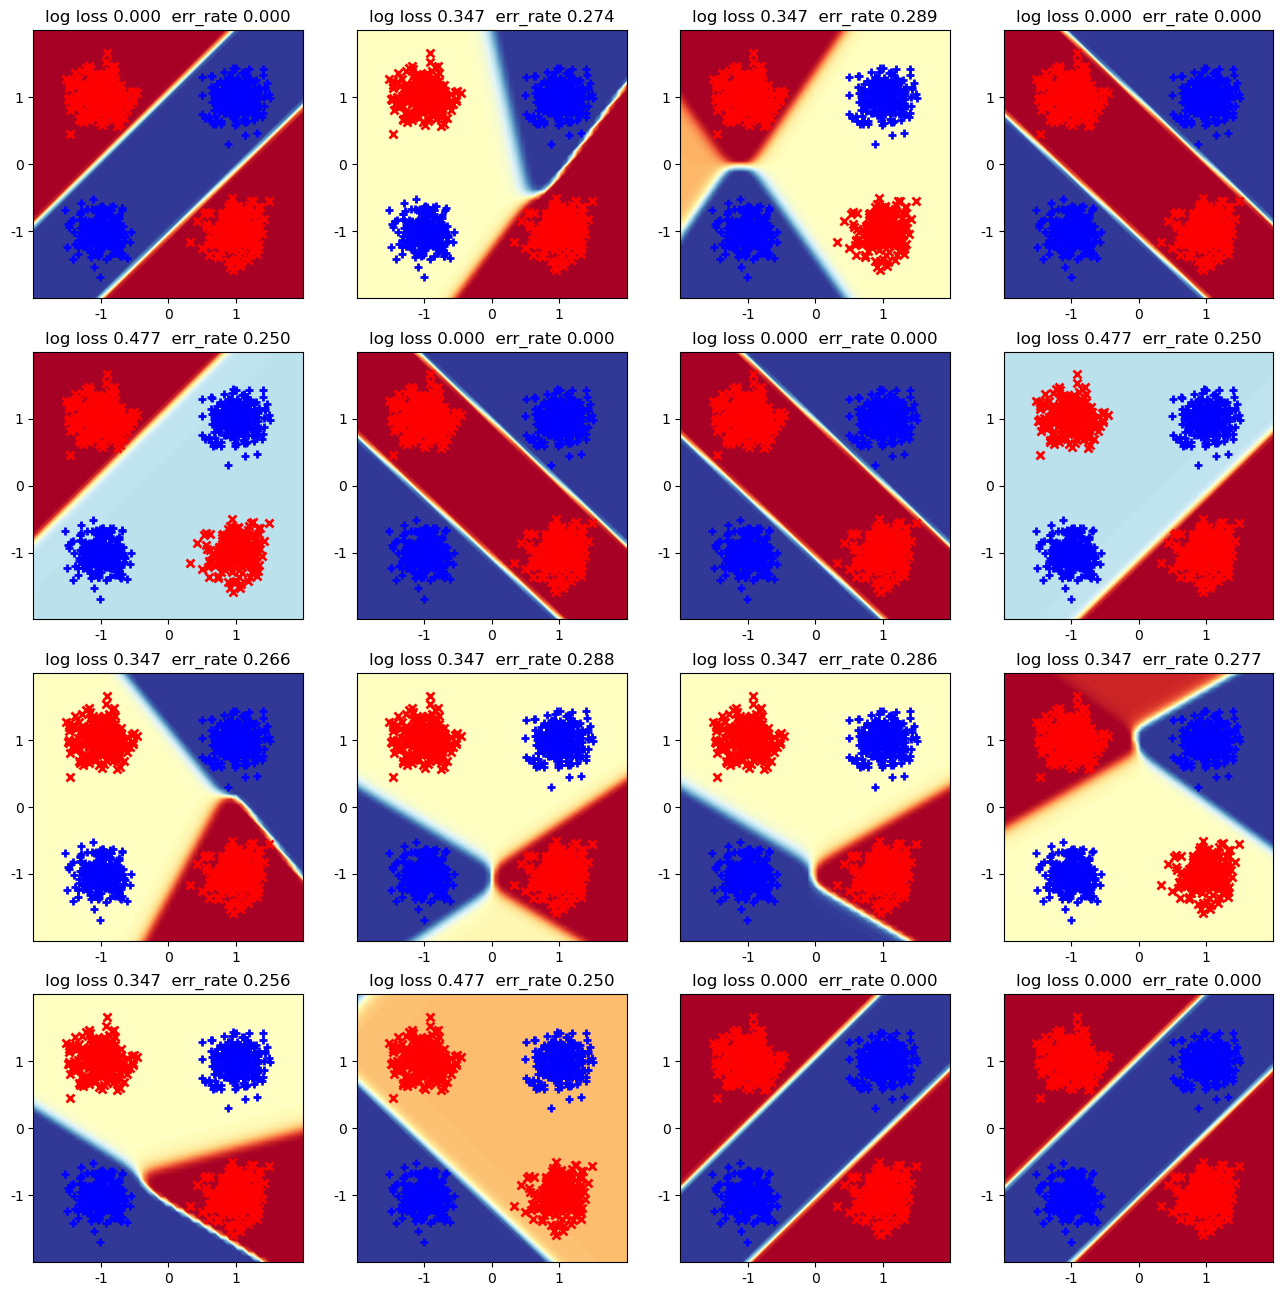

In [87]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
# plot_pretty_probabilities_for_clf(mlp_lbfgs, x_tr_N2, y_tr_N, ax=ax_grid[0,0])
for i in range(n_runs):
    ax_row_idx = i // ncols
    ax_col_idx = i % ncols
    plot_pretty_probabilities_for_clf(act_logistic_clf_list[i], x_tr_N2, y_tr_N, ax=ax_grid[ax_row_idx, ax_col_idx])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

In [88]:
print(np.array(act_logistic_converge_iters_list).mean())

68.5625


**Answer**:
> In total 16 runs, 6 runs ( i.e. random_state = 0, 3, 5, 6, 14, 15 ) reach 0 training error. So the fraction is $\frac{3}{8}$  ( i.e. $\frac{6}{16}$ ).
> 
> Others models have varied error rate from 0.250 to 289. The reason for this is that we use a different activation
> function this time (i.e. logistic functioin, which has a sigmoid curve shape). This could be shown that now some decision boundaries are curves instead of straight lines as in "ReLU"-activation-funtion case. We could see that some inputs data are close to the decision boundaries, which is probably the reason why we have a slightly higher error rate in this case.
>
> On average, it takes 68.56 iterations for models to converge (i.e. we do it by recording each converging iterations for each model, and compute the mean of this list)
>


### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [89]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

sgd_solver_ReLU_clf_list = []
sgd_solver_ReLU_converge_iters_list = []
mlp_sgd_relu_losscurve_list = []

n_runs = 16
for rand_state in range(n_runs):
    print(rand_state)
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=rand_state,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
        mlp_sgd.did_converge = True if len(warn_list) == 0 else False
        elapsed_time_sec = time.time() - start_time_sec
        sgd_solver_ReLU_clf_list.append(mlp_sgd)
        print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
            rand_state+1, n_runs, elapsed_time_sec,
            len(mlp_sgd.loss_curve_),
                'converged    ' if mlp_sgd.did_converge else 'NOT converged',
                mlp_sgd.loss_))
        sgd_solver_ReLU_converge_iters_list.append(len(mlp_sgd.loss_curve_))
        mlp_sgd_relu_losscurve_list.append(mlp_sgd.loss_curve_)

0
finished SGD run  1/16 after    1.4 sec | 267 epochs | converged     | loss 0.347
1
finished SGD run  2/16 after    1.6 sec | 307 epochs | converged     | loss 0.478
2
finished SGD run  3/16 after    1.2 sec | 239 epochs | converged     | loss 0.347
3
finished SGD run  4/16 after    2.1 sec | 400 epochs | NOT converged | loss 0.001
4
finished SGD run  5/16 after    1.4 sec | 275 epochs | converged     | loss 0.347
5
finished SGD run  6/16 after    2.1 sec | 400 epochs | NOT converged | loss 0.001
6
finished SGD run  7/16 after    2.1 sec | 400 epochs | NOT converged | loss 0.001
7
finished SGD run  8/16 after    1.4 sec | 273 epochs | converged     | loss 0.347
8
finished SGD run  9/16 after    1.1 sec | 219 epochs | converged     | loss 0.347
9
finished SGD run 10/16 after    2.1 sec | 400 epochs | NOT converged | loss 0.001
10
finished SGD run 11/16 after    2.0 sec | 394 epochs | converged     | loss 0.478
11
finished SGD run 12/16 after    2.0 sec | 400 epochs | NOT converged | l

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

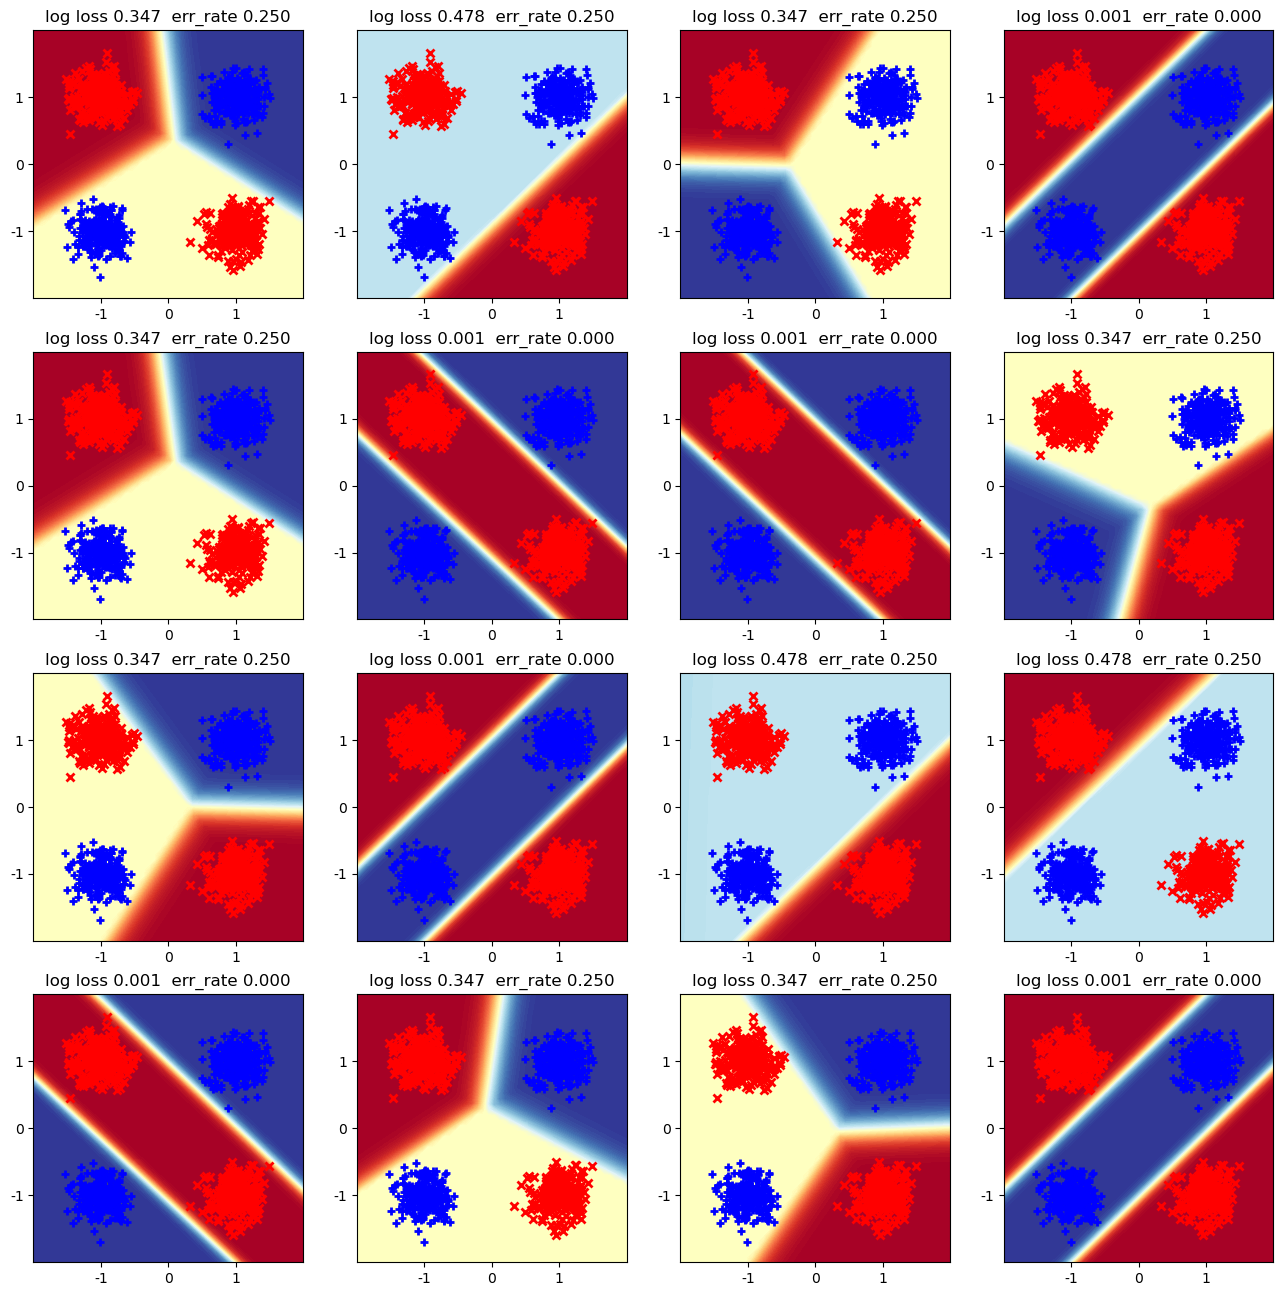

In [90]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(n_runs):
    ax_row_idx = i // ncols
    ax_col_idx = i % ncols
    plot_pretty_probabilities_for_clf(sgd_solver_ReLU_clf_list[i], x_tr_N2, y_tr_N, ax=ax_grid[ax_row_idx, ax_col_idx])

In [91]:
print(np.array(sgd_solver_ReLU_converge_iters_list).mean())

338.0625


#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 
> In total 16 runs, 6 runs ( i.e. random_state = 3, 5, 6, 9, 12, 15 ) reach 0 training error. So the fraction is $\frac{3}{8}$  ( i.e. $\frac{6}{16}$ ).
> 
> Others all have the error rate 0.25. 
>
> Although this model (i.e. using 'SGD' sover and 'ReLU' activation funtion) performs better than its counterpart in
>Q1 ( e.g. $\frac{3}{8}$ v.s. $\frac{1}{4}$ 0 training error rate), it need more time and iterations ( e.g. the avg # of iterations 338.06  v.s. 28.75 in Q1; and this model requires at least 1.2s to finish while the model in Q1 requires 0s ).
>
> It's probably since SGD uses first derivative of the network loss and only subset of the data-set ( i.e. batch_size )to update its weight each iteration, it needs more iterations to converge or get the optimal solution.

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**:
> The most noticeably difference is the time and iterations it needs to when training models.
>
> The avg # of iterations it needs to train the model in Q3 is 338.06, while that number is only 28.75 in Q1, which means traning model is almost 10 times slower in Q3. The time it consumes is also a huge difference. It consumes at least 1.2s in Q3 while it only needs 0s in Q1.
>
>As we discussed this in 3(b). It's probably since SGD uses first derivative of the network loss compared to first and second derivatives utilized in L-BFGS, and only subset of the data-set ( i.e. batch_size ) used to update its weight each iteration in SGD, it needs more iterations to converge or get the optimal solution.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [92]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation
sgd_solver_logistic_clf_list = []
sgd_solver_logistic_converge_iters_list = []
mlp_sgd_logistic_losscurve_list = []

n_runs = 16
for rand_state in range(n_runs):
    print(rand_state)
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=rand_state,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
        mlp_sgd.did_converge = True if len(warn_list) == 0 else False
        elapsed_time_sec = time.time() - start_time_sec
        sgd_solver_logistic_clf_list.append(mlp_sgd)
        print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
            rand_state+1, n_runs, elapsed_time_sec,
            len(mlp_sgd.loss_curve_),
                'converged    ' if mlp_sgd.did_converge else 'NOT converged',
                mlp_sgd.loss_))
        sgd_solver_logistic_converge_iters_list.append(len(mlp_sgd.loss_curve_))
        mlp_sgd_logistic_losscurve_list.append(mlp_sgd.loss_curve_)

0
finished SGD run  1/16 after    0.8 sec | 161 epochs | converged     | loss 0.693
1
finished SGD run  2/16 after    2.1 sec | 400 epochs | NOT converged | loss 0.005
2
finished SGD run  3/16 after    2.0 sec | 400 epochs | NOT converged | loss 0.005
3
finished SGD run  4/16 after    1.1 sec | 215 epochs | converged     | loss 0.693
4
finished SGD run  5/16 after    2.1 sec | 400 epochs | NOT converged | loss 0.351
5
finished SGD run  6/16 after    2.1 sec | 400 epochs | NOT converged | loss 0.005
6
finished SGD run  7/16 after    2.0 sec | 400 epochs | NOT converged | loss 0.005
7
finished SGD run  8/16 after    2.1 sec | 400 epochs | NOT converged | loss 0.351
8
finished SGD run  9/16 after    2.0 sec | 400 epochs | NOT converged | loss 0.351
9
finished SGD run 10/16 after    2.0 sec | 400 epochs | NOT converged | loss 0.351
10
finished SGD run 11/16 after    0.6 sec | 124 epochs | converged     | loss 0.693
11
finished SGD run 12/16 after    2.0 sec | 400 epochs | NOT converged | l

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

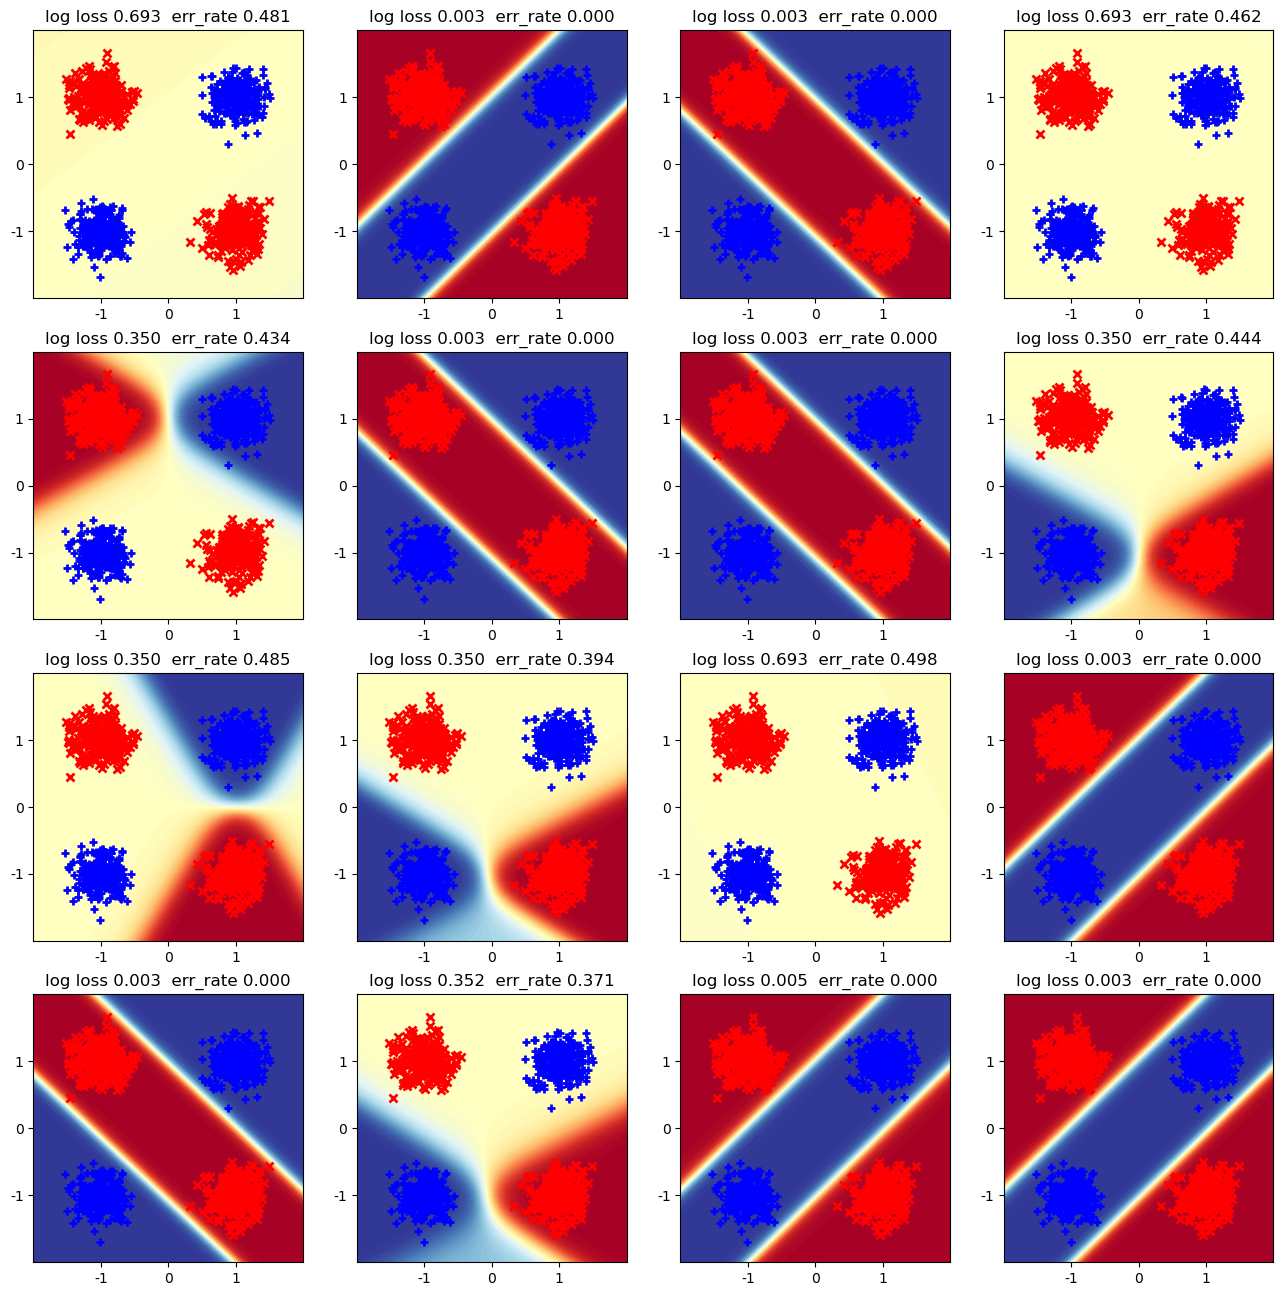

In [93]:
# TODO edit to plot all 16 runs from previous step

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(n_runs):
    ax_row_idx = i // ncols
    ax_col_idx = i % ncols
    plot_pretty_probabilities_for_clf(sgd_solver_logistic_clf_list[i], x_tr_N2, y_tr_N, ax=ax_grid[ax_row_idx, ax_col_idx])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

In [94]:
print(np.array(sgd_solver_logistic_converge_iters_list).mean())

356.25


**Answer**: 
> In total 16 runs, 8 runs ( i.e. random_state = 1, 2, 5, 6, 11, 12, 14, 15 ) reach 0 training error. So the fraction is $\frac{1}{2}$  ( i.e. $\frac{8}{16}$ ).
> 
> Others all have relatively large the error rate from 0.371 to 0.498. 
>
> The averge # of iterations is 356.25, which is pretty slower than its counterpart in Q2 (i.e. avg # of iterations 68.56).

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: 
>The most noticeably difference lies in two parts: the time (or # of iteratoins) it needs to train the model, and the error rates for those with random_states that doesn't perfectly classify the data.  
>
> In Q4, it needs more time to train the model, and the error rates for those that don't perfectly classify the data are relatively large compared to those in Q2.
>
> The reasons are probably that, first SGD only uses stochastic selected subset of the data-set (i.e. batch_size = 10) to update its wegith per iteration, which leads to more iterations to converge or getting to its optimal solution.    
> Second SGD only uses the first derivative of the network loss, and it really depend on the initial state (i.e. random_state). If the initial state is not very good, it may end up with very bad performance (i.e. large error rate).

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

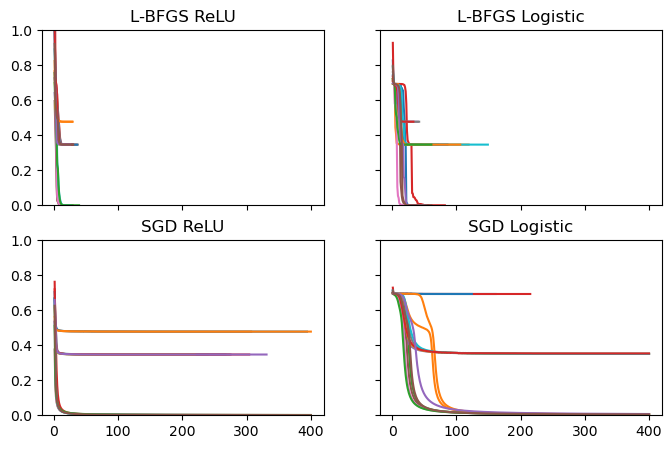

In [95]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,1].set_title('L-BFGS Logistic')
    
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,1].set_title('SGD Logistic')
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

# L-BFGS ReLU
for i in range(n_runs):
    x = [ (i + 1) for i in range(len(mlp_lbfgs_relu_losscurve_list[i])) ]
    y = mlp_lbfgs_relu_losscurve_list[i]
    ax_grid[0,0].plot(x, y)

# L-BFGS Logistic
for i in range(n_runs):
    x = [ (i + 1) for i in range(len(mlp_lbfgs_logistic_losscurve_list[i])) ]
    y = mlp_lbfgs_logistic_losscurve_list[i]
    ax_grid[0,1].plot(x, y)

# SGD ReLU
for i in range(n_runs):
    x = [ (i + 1) for i in range(len(mlp_sgd_relu_losscurve_list[i])) ]
    y = mlp_sgd_relu_losscurve_list[i]
    ax_grid[1,0].plot(x, y)
    
# SGD Logistic
for i in range(n_runs):
    x = [ (i + 1) for i in range( len(mlp_sgd_logistic_losscurve_list[i])) ]
    y = mlp_sgd_logistic_losscurve_list[i]
    ax_grid[1,1].plot(x, y)

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** 
> From the graphs above, we could easily see that ReLu is easier to optimize, since it needs less iterations for the loss function to converge (i.e. its slope becomes 0), while Logistic needs more iterations in general.
>
>
>

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: 
> The result shows something, but it's still not 100% convincing, though.
>
> First, the original data-set only has 1000 entries, which is a relatively small data-set. we should also try a relatively large-size data-set to see if ReLu is still easier to optimize.
>
> Second, each input data in the original data-set only has two features ( i.e. $x_{1}$ and $x_{2}$ ), we should also try these 2x2 combinations ( i.e. L-BFGS ReLU, L-BFGS Logistic, SGD ReLU, SGD Logistic ) on input data with more features.
>
> Third, the layout of the orginal data-set is pretty simple ( i.e. XOR pattern ). We should try more complicated data-set layout pattern to see if ReLU is still easier to optimize.